## Corrección al experimento 1

Por calcular la desviación estandar de la pendiente

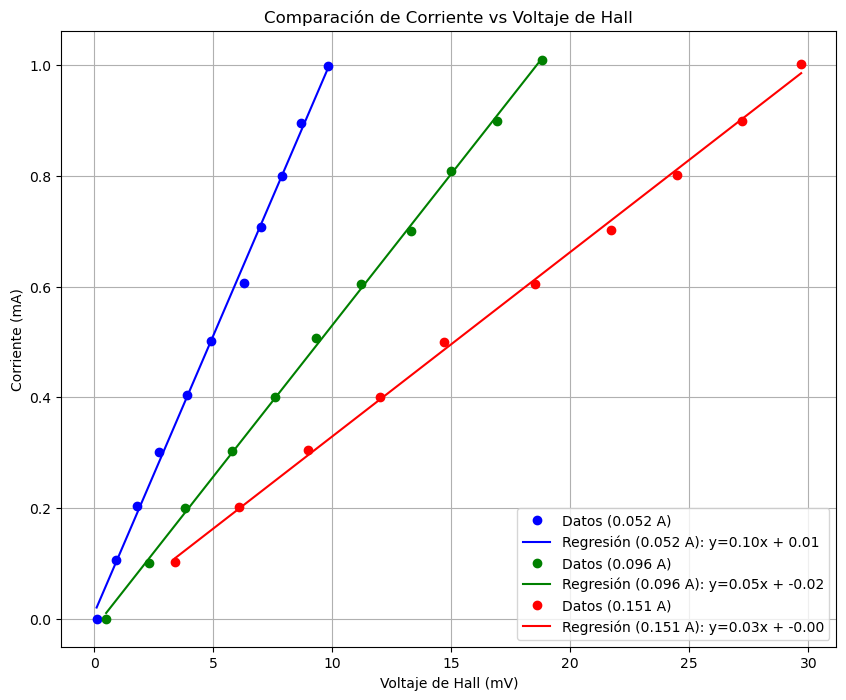

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Los datos para una corriente de control de 0.052 A (El primer conjunto de datos)
corriente_052 = [0.000, 0.106, 0.204, 0.301, 0.404, 0.502, 0.607, 0.707, 0.800, 0.896, 0.998]  ## Corriente en A
voltaje_hall_052 = [0.1, 0.9, 1.8, 2.7, 3.9, 4.9, 6.3, 7.0, 7.9, 8.7, 9.8]  ## Voltaje de Hall en mV

## Los datos para una corriente de control de 0.096 A (El segundo conjunto de datos)
corriente_096 = [0.000, 0.100, 0.200, 0.303, 0.400, 0.507, 0.604, 0.701, 0.808, 0.899, 1.009]  ## Corriente en A
voltaje_hall_096 = [0.50, 2.30, 3.80, 5.80, 7.60, 9.30, 11.20, 13.30, 15.00, 16.90, 18.80]  ## Voltaje de Hall en mV

## Los datos para una corriente de control de 0.151 A (El tercer conjunto de datos)
corriente_151 = [0.102, 0.201, 0.304, 0.400, 0.500, 0.604, 0.703, 0.802, 0.900, 1.003]  ## Corriente en A
voltaje_hall_151 = [3.4, 6.1, 9.0, 12.0, 14.7, 18.5, 21.7, 24.5, 27.2, 29.7]  ## Voltaje de Hall en mV

## Hacemos la regresión lineal para cada uno de los tres conjuntos
slope_052, intercept_052, r_value_052, p_value_052, std_err_052 = linregress(voltaje_hall_052, corriente_052)
slope_096, intercept_096, r_value_096, p_value_096, std_err_096 = linregress(voltaje_hall_096, corriente_096)
slope_151, intercept_151, r_value_151, p_value_151, std_err_151 = linregress(voltaje_hall_151, corriente_151)

## Calculamos las líneas de regresión nuevamente para cada uno de los tres conjuntos
regression_line_052 = slope_052 * np.array(voltaje_hall_052) + intercept_052
regression_line_096 = slope_096 * np.array(voltaje_hall_096) + intercept_096
regression_line_151 = slope_151 * np.array(voltaje_hall_151) + intercept_151

## Imprimimos los gráficos junto con su regresión lineal en una sola gráfica
plt.figure(figsize=(10, 8))

## Para el conjunto 1
plt.plot(voltaje_hall_052, corriente_052, 'bo', label='Datos (0.052 A)')
plt.plot(voltaje_hall_052, regression_line_052, 'b-', label=f'Regresión (0.052 A): y={slope_052:.2f}x + {intercept_052:.2f}')

## Para el conjunto 2
plt.plot(voltaje_hall_096, corriente_096, 'go', label='Datos (0.096 A)')
plt.plot(voltaje_hall_096, regression_line_096, 'g-', label=f'Regresión (0.096 A): y={slope_096:.2f}x + {intercept_096:.2f}')

## Para el conjunto 3
plt.plot(voltaje_hall_151, corriente_151, 'ro', label='Datos (0.151 A)')
plt.plot(voltaje_hall_151, regression_line_151, 'r-', label=f'Regresión (0.151 A): y={slope_151:.2f}x + {intercept_151:.2f}')
plt.title('Comparación de Corriente vs Voltaje de Hall')
plt.xlabel('Voltaje de Hall (mV)')
plt.ylabel('Corriente (mA)')
plt.legend()
plt.grid(True)
plt.show()


### Modificación al código para que calcule también la desviación estandar de la pendiente (que será nuestra incertidumbre)
Basicamente es el mismo código que el anterior pero se le agregaron un par de líneas de código para calcula la desviación estandar de la pendiente como dice en el título.

Desviación estándar de las pendientes: 0.03


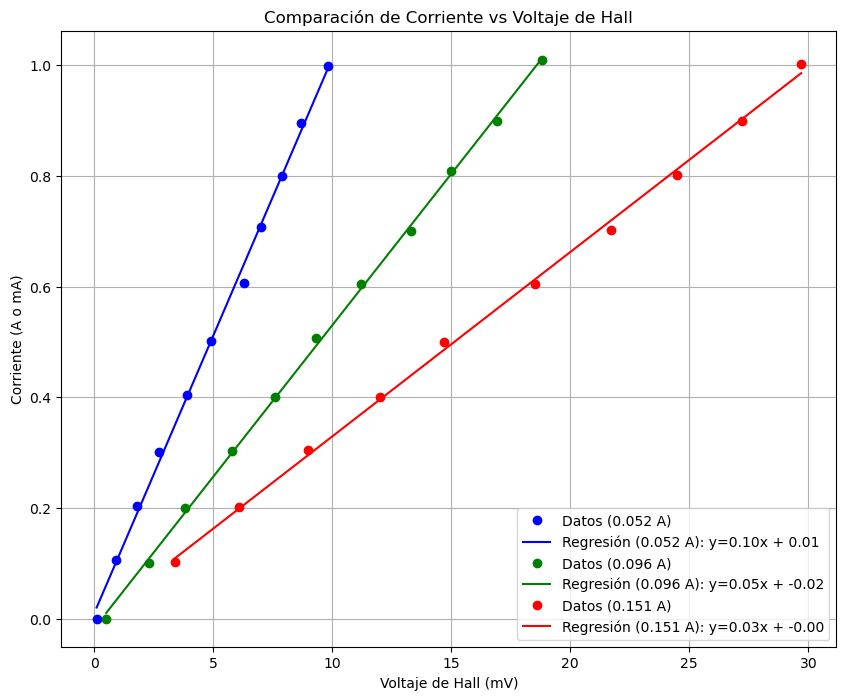

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Los datos para una corriente de control de 0.052 A (El primer conjunto de datos)
corriente_052 = [0.000, 0.106, 0.204, 0.301, 0.404, 0.502, 0.607, 0.707, 0.800, 0.896, 0.998]  ## Corriente en A
voltaje_hall_052 = [0.1, 0.9, 1.8, 2.7, 3.9, 4.9, 6.3, 7.0, 7.9, 8.7, 9.8]  ## Voltaje de Hall en mV

## Los datos para una corriente de control de 0.096 A (El segundo conjunto de datos)
corriente_096 = [0.000, 0.100, 0.200, 0.303, 0.400, 0.507, 0.604, 0.701, 0.808, 0.899, 1.009]  ## Corriente en A
voltaje_hall_096 = [0.50, 2.30, 3.80, 5.80, 7.60, 9.30, 11.20, 13.30, 15.00, 16.90, 18.80]  ## Voltaje de Hall en mV

## Los datos para una corriente de control de 0.151 A (El tercer conjunto de datos)
corriente_151 = [0.102, 0.201, 0.304, 0.400, 0.500, 0.604, 0.703, 0.802, 0.900, 1.003]  ## Corriente en mA
voltaje_hall_151 = [3.4, 6.1, 9.0, 12.0, 14.7, 18.5, 21.7, 24.5, 27.2, 29.7]  ## Voltaje de Hall en mV

## Hacemos la regresión lineal para cada uno de los tres conjuntos
slope_052, intercept_052, r_value_052, p_value_052, std_err_052 = linregress(voltaje_hall_052, corriente_052)
slope_096, intercept_096, r_value_096, p_value_096, std_err_096 = linregress(voltaje_hall_096, corriente_096)
slope_151, intercept_151, r_value_151, p_value_151, std_err_151 = linregress(voltaje_hall_151, corriente_151)

## Ahora lo que haremos es almacenar las pendientes en un arreglo sobre el cual calcularemos la desviación estandar
slopes = [slope_052, slope_096, slope_151]

## Se calcula el promedio del arreglo que contiene a las pendientes 
mean_slope = np.mean(slopes)

## Una vez obtenido el promedio entonces seguimos la definición de desviación estandar y la calculmamos
sigma_slope = np.sqrt(np.sum((slopes - mean_slope) ** 2) / len(slopes))

## Imprimimos en pantalla el resultado
print(f"Desviación estándar de las pendientes: {sigma_slope:.2f}")

## Calculamos las líneas de regresión nuevamente para cada uno de los tres conjuntos
regression_line_052 = slope_052 * np.array(voltaje_hall_052) + intercept_052
regression_line_096 = slope_096 * np.array(voltaje_hall_096) + intercept_096
regression_line_151 = slope_151 * np.array(voltaje_hall_151) + intercept_151

## Imprimimos los gráficos junto con su regresión lineal en una sola gráfica
plt.figure(figsize=(10, 8))

## Para el conjunto 1
plt.plot(voltaje_hall_052, corriente_052, 'bo', label='Datos (0.052 A)')
plt.plot(voltaje_hall_052, regression_line_052, 'b-', label=f'Regresión (0.052 A): y={slope_052:.2f}x + {intercept_052:.2f}')

## Para el conjunto 2
plt.plot(voltaje_hall_096, corriente_096, 'go', label='Datos (0.096 A)')
plt.plot(voltaje_hall_096, regression_line_096, 'g-', label=f'Regresión (0.096 A): y={slope_096:.2f}x + {intercept_096:.2f}')

## Para el conjunto 3
plt.plot(voltaje_hall_151, corriente_151, 'ro', label='Datos (0.151 A)')
plt.plot(voltaje_hall_151, regression_line_151, 'r-', label=f'Regresión (0.151 A): y={slope_151:.2f}x + {intercept_151:.2f}')
plt.title('Comparación de Corriente vs Voltaje de Hall')
plt.xlabel('Voltaje de Hall (mV)')
plt.ylabel('Corriente (A o mA)')
plt.legend()
plt.grid(True)
plt.show()


## Corrección al experimento 2

Considerando una corriente de control de .93$A = I$ corriente para cada dato de campo magnetico medido su correspondiente dato en y esta dado por la ecuación $V_H = \frac{I B_{z}}{M}$ donde M es el grosor de la punta Hall es de .15$mm$ y como mencionamos previamente el valor de $I$ es .93$A$

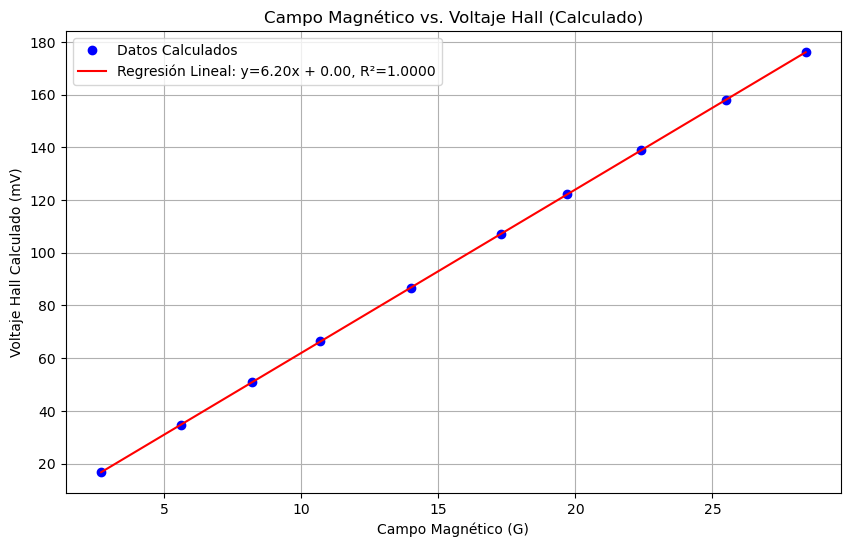

Pendiente de la gráfica: 6.20
R²: 1.0000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Definimos nuestras constantes para el experimento
I = 0.93  ## La corriente de control dado en A
M = 0.15  ## Elrosor de la punta Hall dado en mm

## Los datos del campo magnetico se mantienen iguales
campo_magnetico = [2.7, 5.6, 8.2, 10.7, 14.0, 17.3, 19.7, 22.4, 25.5, 28.4]  ## Medidos en G (Gauss)

## Para el eje y calculamos el voltaje de Hall con la ecuación de arriba
voltaje_hall_calculado = [(I * Bz) / M for Bz in campo_magnetico]

## Hacemos la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(campo_magnetico, voltaje_hall_calculado)

## Procedemos con la línea de regresión
regression_line = slope * np.array(campo_magnetico) + intercept

##Graficamos los datos
plt.figure(figsize=(10, 6))
plt.plot(campo_magnetico, voltaje_hall_calculado, 'bo', label='Datos Calculados')
plt.plot(campo_magnetico, regression_line, 'r-', label=f'Regresión Lineal: y={slope:.2f}x + {intercept:.2f}, R²={r_value**2:.4f}')
plt.xlabel('Campo Magnético (G)')
plt.ylabel('Voltaje Hall Calculado (mV)')
plt.title('Campo Magnético vs. Voltaje Hall (Calculado)')
plt.legend()
plt.grid(True)
plt.show()

print(f'Pendiente de la gráfica: {slope:.2f}')
print(f'R²: {r_value**2:.4f}')
